In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm.notebook import tqdm
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import OneHotEncoder

In [18]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "blue"])

In [19]:
data, labels = make_blobs(n_samples = 1000, centers = 4, n_features = 2, random_state = 0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


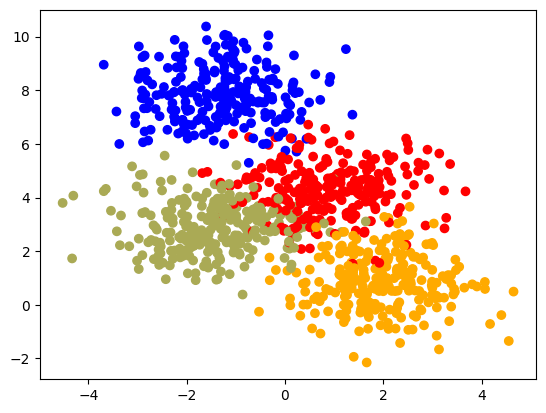

In [20]:
plt.scatter(data[:,0], data[:,1], c = labels, cmap = cmap)
plt.show()

In [21]:
labels_orig = labels
labels = np.mod(labels_orig, 2)

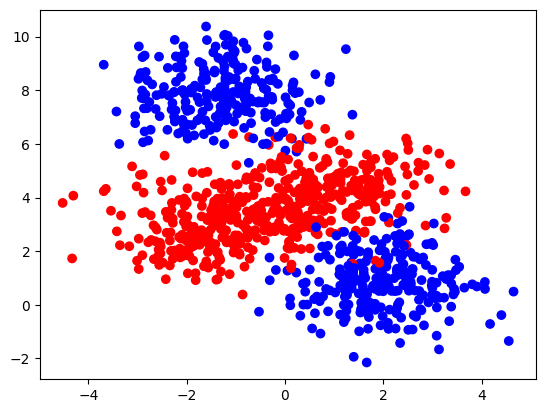

In [22]:
plt.scatter(data[:,0], data[:,1], c = labels, cmap = cmap)
plt.show()

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify = labels, random_state = 0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(750, 2) (250, 2) (750,) (250,)


# **One Weight Update**

In [30]:
class FFNetworkW1:
    def __init__(self):
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.w3 = np.random.randn()
        self.w4 = np.random.randn()
        self.w5 = np.random.randn()
        self.w6 = np.random.randn()
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    def forward_pass(self, x):
        self.x1, self.x2 = x
        self.a1 = self.w1 * self.x1 + self.w2 * self.x2 + self.b1
        self.h1 = self.sigmoid(self.a1)
        self.a2 = self.w3 * self.x1 + self.w4 * self.x2 + self.b2
        self.h2 = self.sigmoid(self.a2)
        self.a3 = self.w5 * self.h1 + self.w6 * self.h2 + self.b3
        self.h3 = self.sigmoid(self.a3)
        return self.h3      
    def grad(self, x, y):
        self.forward_pass(x)
        self.dw1 = (self.h3 - y) * (self.h3) * (1 - self.h3) * (self.w5) * (self.h1) * (1 - self.h1) * (self.x1)
    def predict(self, X):
        Y = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y.append(y_pred)
        return np.array(Y)
    def fit(self, X, Y, epochs = 1, lr=1, display_loss = False):
        if display_loss:
            loss = {}
            W1 = {}
        for i in tqdm(range(epochs), total = epochs, unit = "epoch"):
            dw1 = 0
            for x,y in zip(X, Y):
                self.grad(x, y)
                dw1 += self.dw1
            m = X.shape[0]
            self.w1 -= lr * dw1 / m
            if display_loss:
                W1[i] = self.w1
                Y_pred = self.predict(X)
                loss[i] = mean_squared_error(Y_pred, Y)
        if display_loss:
            plt.tight_layout()
            plt.subplot(2,1,1)
            plt.plot(W1.values())
            plt.xlabel("Epochs")
            plt.ylabel("W1")
            plt.show()       
            
            plt.subplot(2,1,2)
            plt.plot(loss.values())
            plt.xlabel("Epochs")
            plt.ylabel("Mean Squared Error")
            plt.show()

  0%|          | 0/500 [00:00<?, ?epoch/s]

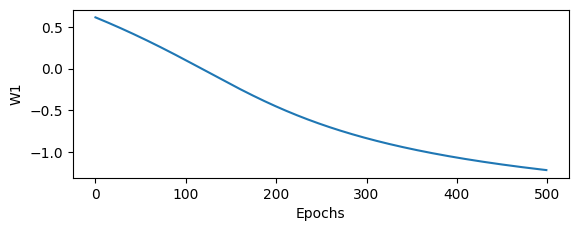

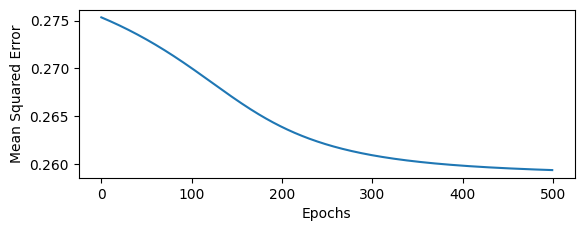

In [32]:
ffnw = FFNetworkW1()
ffnw.fit(X_train, Y_train, epochs = 500, lr = 1, display_loss = True)

# **Multiple Weight Update**

In [16]:
class FFNetwork():
    def __init__(self):
        np.random.seed(0)
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.w3 = np.random.randn()
        self.w4 = np.random.randn()
        self.w5 = np.random.randn()
        self.w6 = np.random.randn()
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    def forward_pass(self, x):
        self.x1 , self.x2 = x
        self.a1 = self.w1 * self.x1 + self.w2 * self.x2 + self.b1
        self.h1 = self.sigmoid(self.a1)
        self.a2 = self.w3 * self.x1 + self.w4 * self.x2 + self.b2 
        self.h2 = self.sigmoid(self.a2)
        self.a3 = self.w5 * self.h1 + self.w6 * self.h2 + self.b3
        self.h3 = self.sigmoid(self.a3)
        return self.h3
    def grad(self,x ,y):
        self.forward_pass(x)
        self.dw1 = (self.h3 - y) * (self.h3) * (1 - self.h3) * (self.w5) * (self.h1) * (1 - self.h1) * (self.x1)
        self.dw2 = (self.h3 - y) * (self.h3) * (1 - self.h3) * (self.w5) * (self.h1) * (1 - self.h1) * (self.x2)
        self.db1 = (self.h3 - y) * (self.h3) * (1 - self.h3) * (self.w5) * (self.h1) * (1 - self.h1)
        self.dw3 = (self.h3 - y) * (self.h3) * (1 - self.h3) * (self.w6) * (self.h2) * (1 - self.h2) * (self.x1)
        self.dw4 = (self.h3 - y) * (self.h3) * (1 - self.h3) * (self.w6) * (self.h2) * (1 - self.h2) * (self.x2)
        self.db2 = (self.h3 - y) * (self.h3) * (1 - self.h3) * (self.w6) * (self.h2) * (1 - self.h2)
        self.dw5 = (self.h3 - y) * (self.h3) * (1 - self.h3) * (self.h1)
        self.dw6 = (self.h3 - y) * (self.h3) * (1 - self.h3) * (self.h2)
        self.db3 = (self.h3 - y) * (self.h3) * (1 - self.h3)
    def predict(self, X):
        Y = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y.append(y_pred)
        return np.array(Y)
    def predict_h1(self, X, binary = True):
        Y = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y.append(self.h1)
        return np.array(Y)
    def predict_h2(self, X, binary = True):
        Y = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y.append(self.h2)
        return np.array(Y)
    def predict_h3(self, X, binary = True):
        Y = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y.append(self.h3)
        return np.array(Y)
    def fit(self, X, Y, epochs = 1, lr = 1, initialise = True, display_loss = False, display_weight = False):
        if initialise:
            np.random.seed(0)
            self.w1 = np.random.randn()
            self.w2 = np.random.randn()
            self.w3 = np.random.randn()
            self.w4 = np.random.randn()
            self.w5 = np.random.randn()
            self.w6 = np.random.randn()
            self.b1 = 0
            self.b2 = 0
            self.b3 = 0
        if display_loss:
            loss = {}
        for i in tqdm(range(epochs), total = epochs, unit = "epoch"):
            dw1 , dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = 9 * [0]
            for x, y in zip(X, Y):
                self.grad(x, y)
                dw1 += self.dw1
                dw2 += self.dw2
                dw3 += self.dw3
                dw4 += self.dw4
                dw5 += self.dw5
                dw6 += self.dw6
                db1 += self.db1
                db2 += self.db2
                db3 += self.db3
            m = X.shape[0]
            self.w1 -= lr * dw1 / m
            self.w2 -= lr * dw2 / m
            self.w3 -= lr * dw3 / m
            self.w4 -= lr * dw4 / m
            self.w5 -= lr * dw5 / m
            self.w6 -= lr * dw6 / m
            self.b1 -= lr * db1 / m
            self.b2 -= lr * db2 / m
            self.b3 -= lr * db3 / m
            if display_loss:
                Y_pred = self.predict(X)
                loss[i] = mean_squared_error(Y_pred, Y)
            if display_weight:
                weight_matrix = np.array([[0, self.b3, self.w5, self.w6, 0, 0],[self.b1, self.w1, self.w2, self.w3, self.w4, self.b2]])
                weight_matrices.append(weight_matrix)
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel("Epochs")
            plt.ylabel("Mean Squared Error")
            plt.show() 

  0%|          | 0/2000 [00:00<?, ?epoch/s]

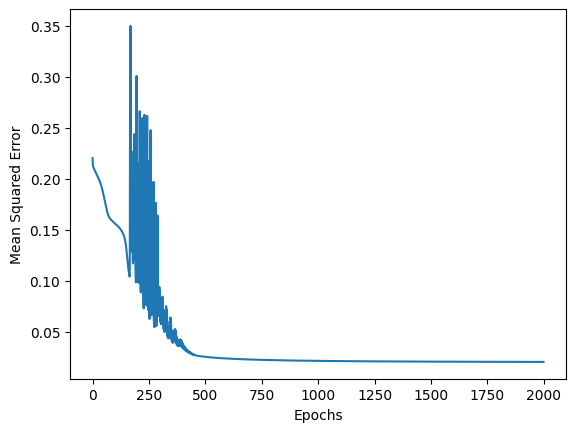

In [17]:
weight_matrices = []
ffn = FFNetwork()
ffn.fit(X_train, Y_train, epochs = 2000, lr = 5, display_loss = True, display_weight = True)

# **Visualising Outputs**

True

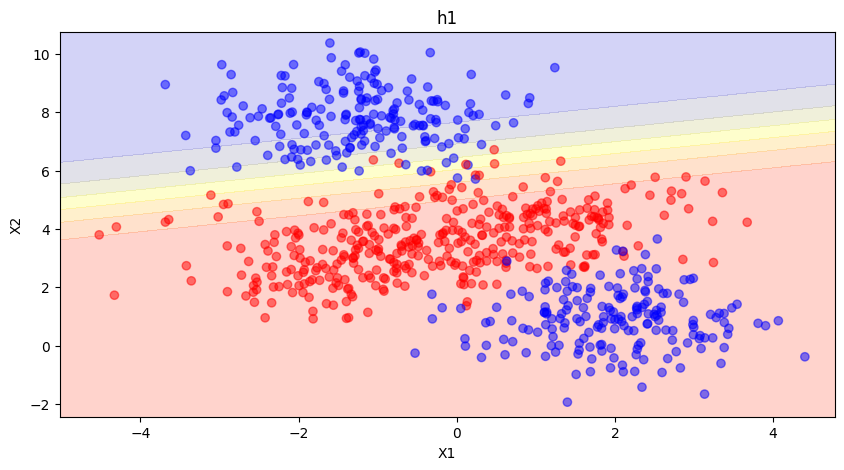

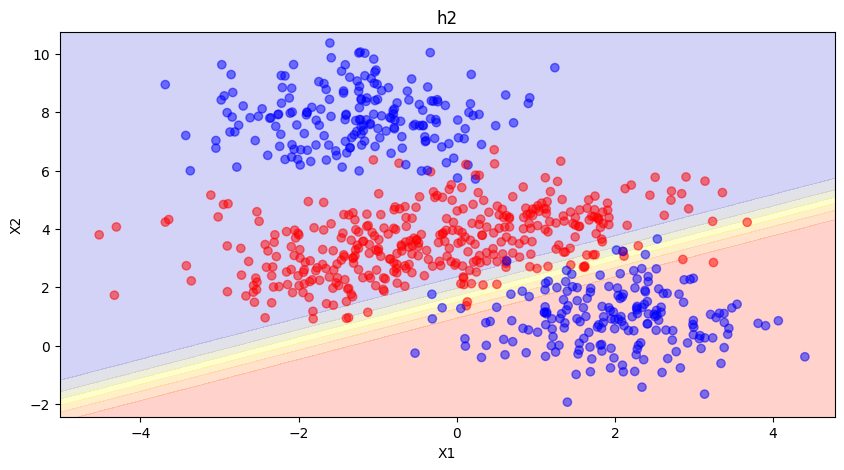

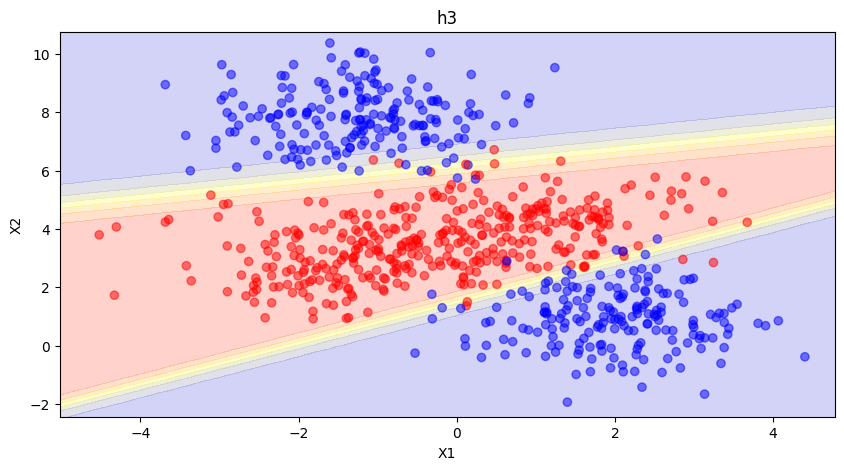

In [18]:
def make_meshgrid(x ,y ,h =.2):
    x_min, x_max = x.min() - 0.5, x.max() + 0.5
    y_min, y_max = y.min() - 0.5, y.max() + 0.5 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax, predict, xx, yy, **params):
    Z = predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
def plot_boundary():
    xx, yy = make_meshgrid(X_train[:, 0], X_train[:, 1])
    predict_functions = [ffn.predict_h1, ffn.predict_h2, ffn.predict_h3]
    for i in range(3):
        fig, ax = plt.subplots(figsize = (10, 5))
        plot_contours(ax, predict_functions[i], xx, yy, cmap = cmap, alpha = 0.2)
        ax.scatter(X_train[:,0], X_train[:,1], c = Y_train, cmap = cmap, alpha = 0.5)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel("X1")
        ax.set_ylabel("X2")
        ax.set_title("h"+str(i + 1))
    return True
plot_boundary()

# **Visualising Weights**

In [35]:
def plot_heat_map(epoch):
    fig = plt.figure(figsize = (10, 1))
    sns.heatmap(weight_matrices[epoch], annot = True, cmap = cmap, vmin = -3, vmax = 3)
    plt.title("Epoch" + str(epoch))
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype ='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    return image

In [36]:
import imageio
from IPython.display import HTML

C:\Users\Admin\AppData\Local\Temp\ipykernel_14324\2365358715.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize = (10, 1))


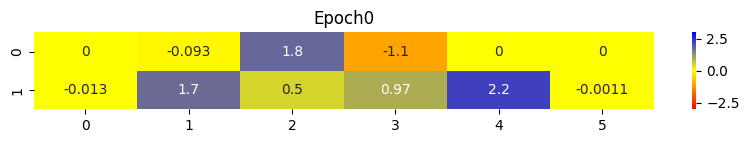

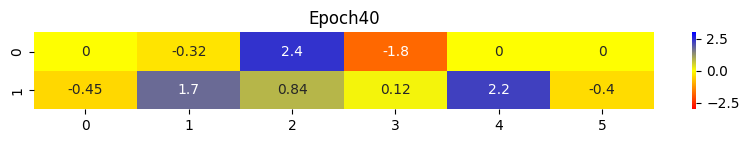

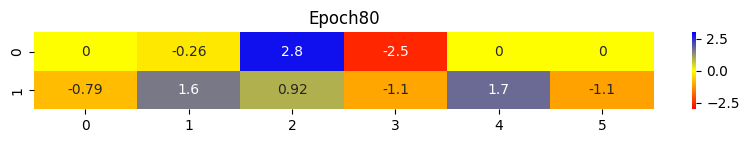

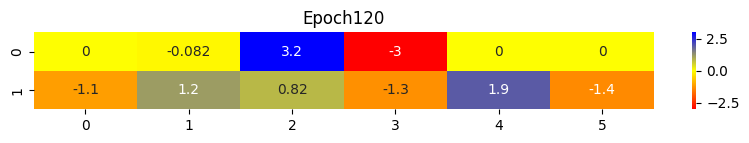

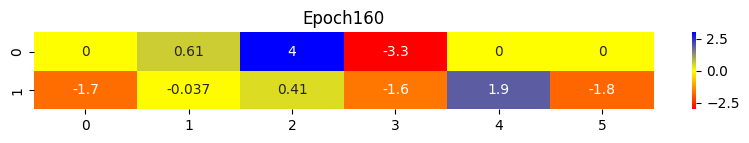

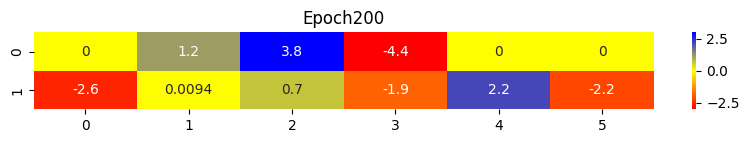

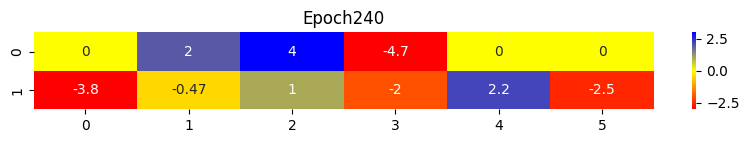

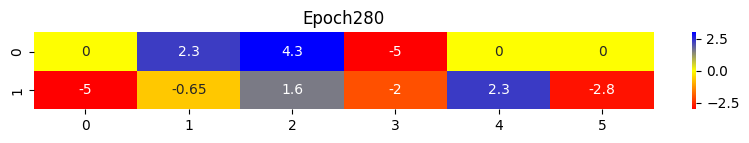

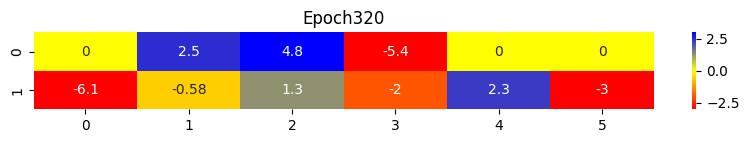

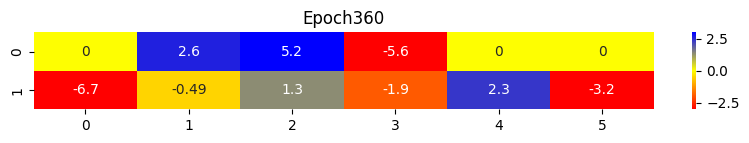

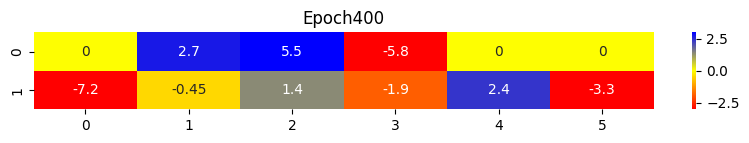

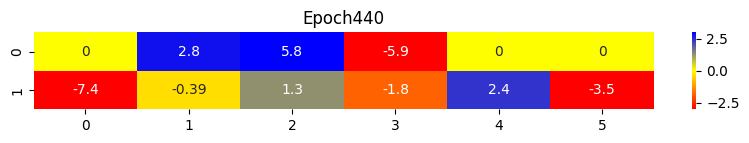

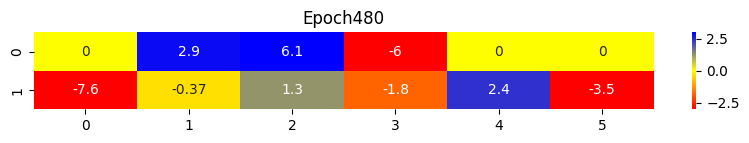

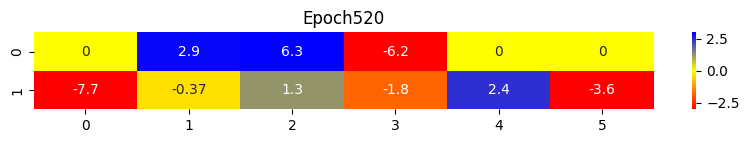

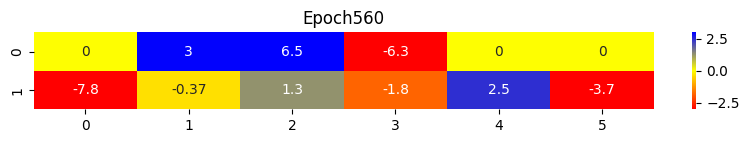

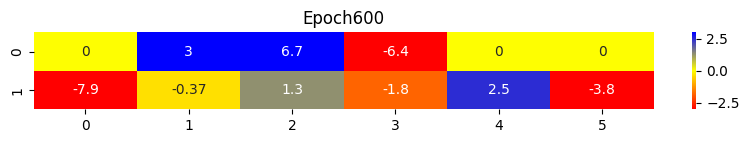

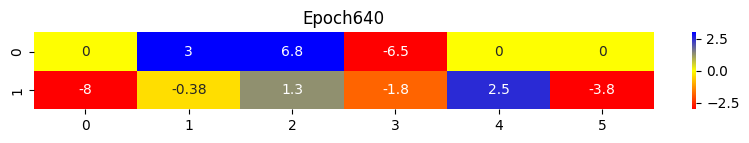

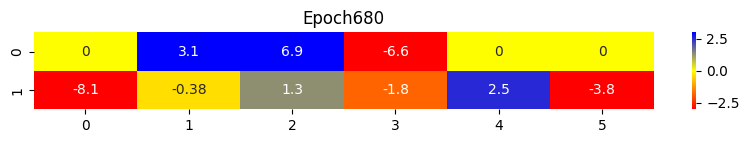

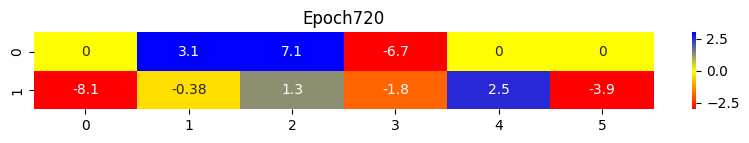

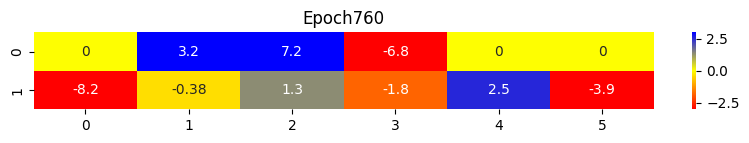

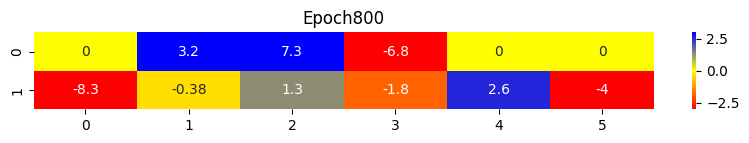

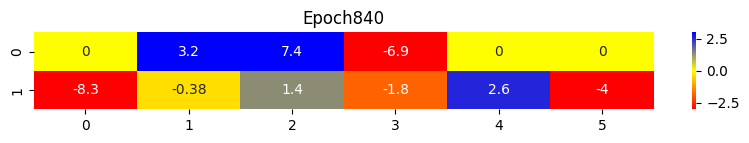

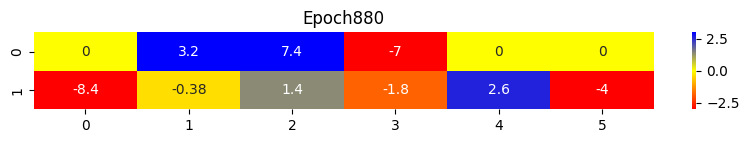

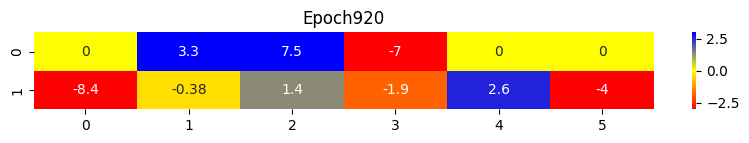

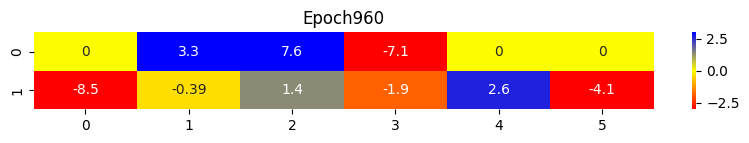

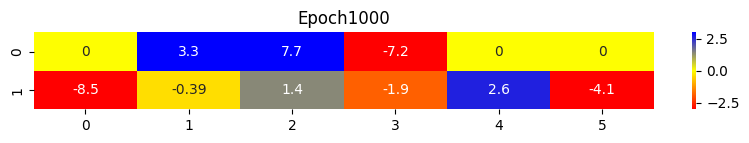

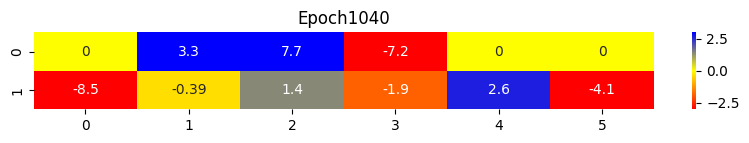

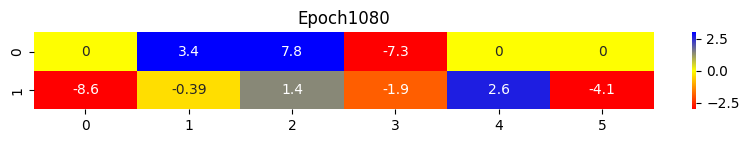

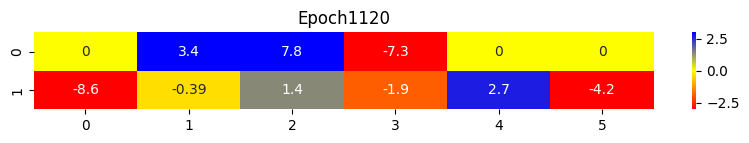

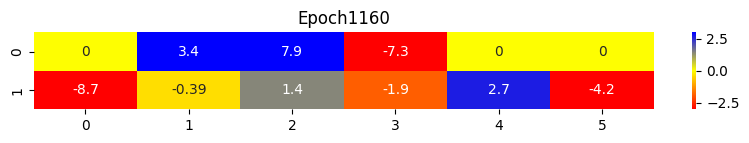

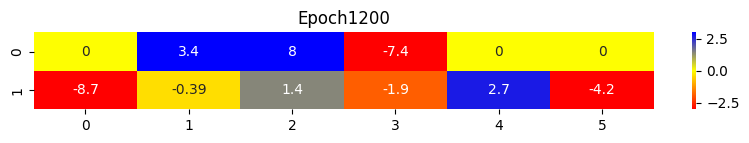

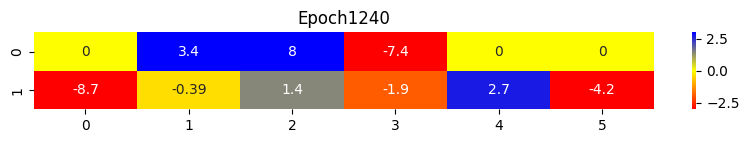

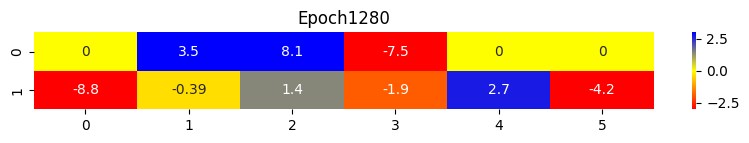

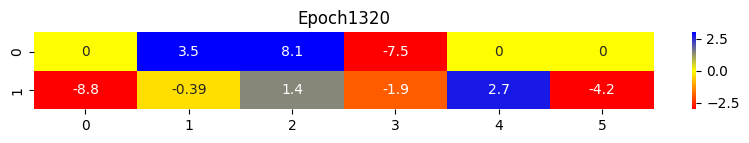

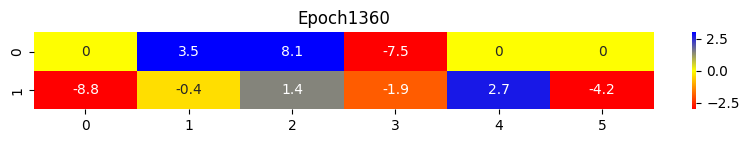

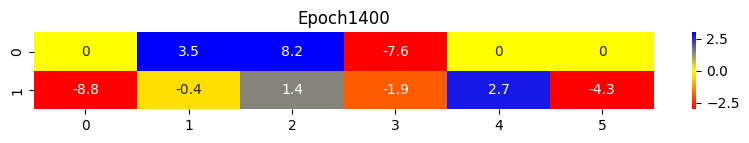

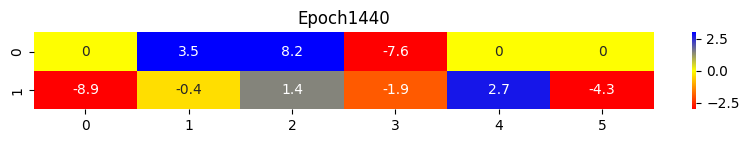

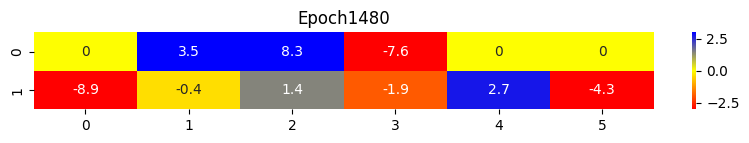

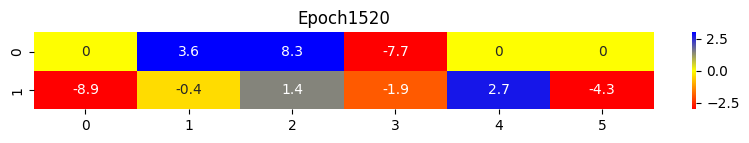

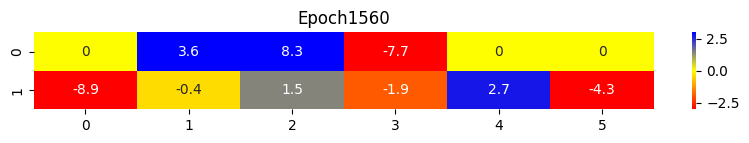

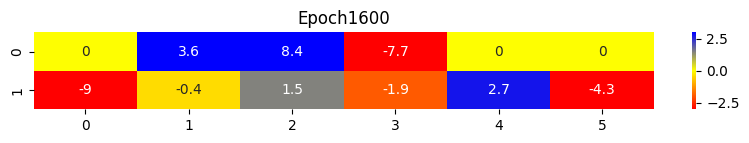

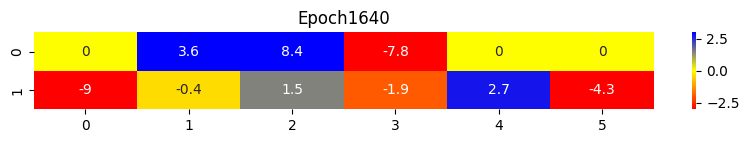

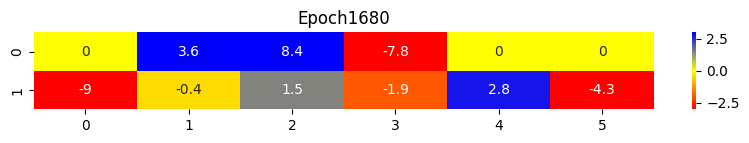

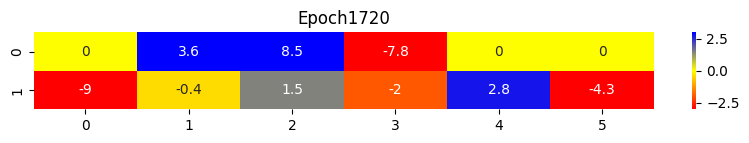

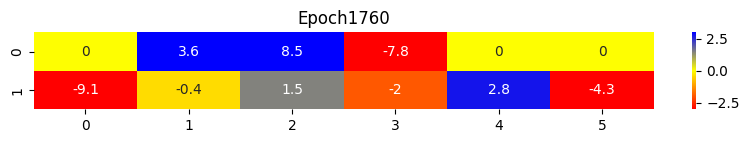

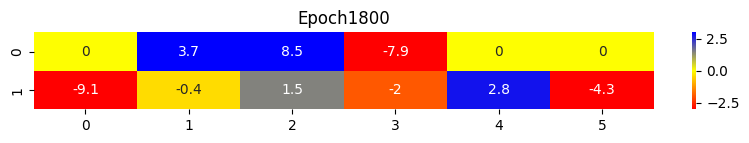

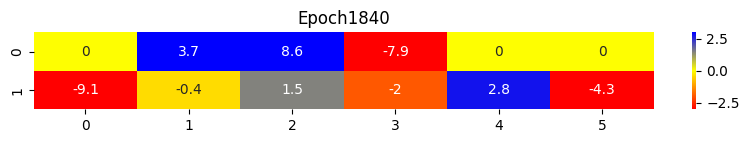

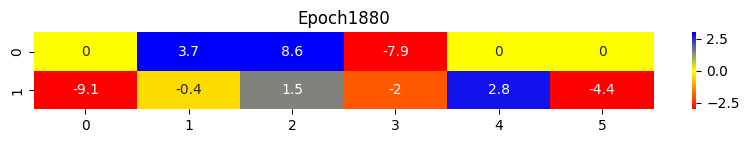

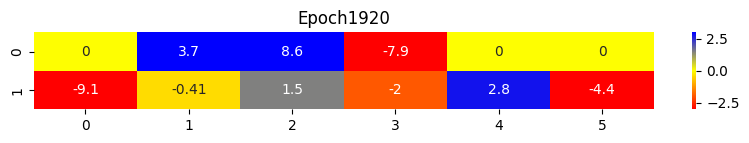

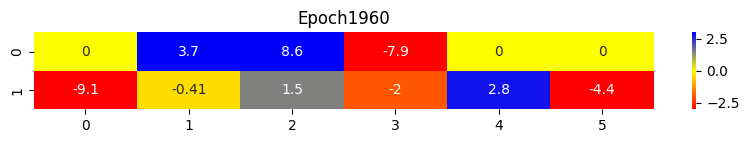

In [30]:
imageio.mimsave('./weights_viz.gif', [plot_heat_map(i) for i in range(0, len(weight_matrices), len(weight_matrices)//50)], duration = 300)

In [33]:
HTML('<img src = "weights_viz.gif">')

In [34]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binerised_train = (Y_pred_train > 0.5).astype("int").ravel()
Y_pred_test = ffn.predict(X_test)
Y_pred_binerised_test = (Y_pred_test > 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binerised_train, Y_train)
accuracy_test = accuracy_score(Y_pred_binerised_test, Y_test)

In [35]:
print("Train accuracy ", accuracy_train)
print("Test accuracy ", accuracy_test)

Train accuracy  0.976
Test accuracy  0.94


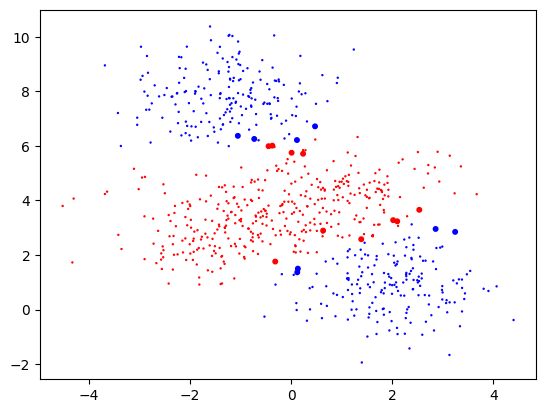

In [38]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binerised_train, cmap = cmap, s = 10*np.abs(Y_pred_binerised_train - Y_train)+.5)
plt.show()

# **MultiClass Classification**

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels_orig, stratify = labels_orig, random_state = 0)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(750, 2) (750,) (250, 2) (250,)


In [25]:
encoder = OneHotEncoder()
y_train_OH = encoder.fit_transform(np.expand_dims(Y_train, 1)).toarray()
y_test_OH = encoder.fit_transform(np.expand_dims(Y_test, 1)).toarray()
print(y_train_OH.shape, y_test_OH.shape)

(750, 4) (250, 4)


In [31]:
class FFNetworkMulti():
    def __init__(self):
        np.random.seed(0)
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.w3 = np.random.randn()
        self.w4 = np.random.randn()
        self.w5 = np.random.randn()
        self.w6 = np.random.randn()
        self.w7 = np.random.randn()
        self.w8 = np.random.randn()
        self.w9 = np.random.randn()
        self.w10 = np.random.randn()
        self.w11 = np.random.randn()
        self.w12 = np.random.randn()
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0
        self.b4 = 0
        self.b5 = 0
        self.b6 = 0
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    def forward_pass(self, x):
        self.x1 ,self.x2 = x
        self.a1 = self.w1 * self.x1 + self.w2 * self.x2 + self.b1
        self.h1 = self.sigmoid(self.a1)
        self.a2 = self.w3 * self.x1 + self.w4 * self.x2 + self.b2
        self.h2 = self.sigmoid(self.a2)
        self.a3 = self.w5 * self.h1 + self.w6 * self.h2 + self.b3
        self.a4 = self.w7 * self.h1 + self.w8 * self.h2 + self.b4
        self.a5 = self.w9 * self.h1 + self.w10 * self.h2 + self.b5
        self.a6 = self.w11 * self.h1 + self.w12 * self.h2 + self.b6
        sum_exp = np.sum([np.exp(self.a3), np.exp(self.a4), np.exp(self.a5), np.exp(self.a6)])
        self.h3 = np.exp(self.a3) / sum_exp
        self.h4 = np.exp(self.a4) / sum_exp
        self.h5 = np.exp(self.a5) / sum_exp
        self.h6 = np.exp(self.a6) / sum_exp
        return np.array([self.h3, self.h4, self.h5, self.h6])
    def grad(self, x, y):
        self.forward_pass(x)
        self.y1, self.y2, self.y3, self.y4 = y
        self.da3 = (self.h3 - self.y1)
        self.da4 = (self.h4 - self.y2) 
        self.da5 = (self.h5 - self.y3)
        self.da6 = (self.h6 - self.y4)
        self.dw5 = self.da3 * self.h1
        self.dw6 = self.da3 * self.h2
        self.db3 = self.da3
        self.dw7 = self.da4 * self.h1
        self.dw8 = self.da4 * self.h2
        self.db4 = self.da4
        self.dw9 = self.da5 * self.h1
        self.dw10 = self.da5 * self.h2
        self.db5 = self.da5
        self.dw11 = self.da6 * self.h1
        self.dw12 = self.da6 * self.h2
        self.db6 = self.da6
        self.dh1 = self.da3 * self.w5 + self.da4 * self.w7 + self.da5 * self.w9 + self.da6 * self.w11
        self.dh2 = self.da3 * self.w6 + self.da4 * self.w8 + self.da5 * self.w10 + self.da6 * self.w12
        self.da1 = self.dh1 * self.h1 * (1 - self.h1)
        self.da2 = self.dh2 * self.h2 * (1 - self.h2)
        self.dw1 = self.da1 * self.x1
        self.dw2 = self.da1 * self.x2
        self.db1 = self.da1
        self.dw3 = self.da2 * self.x1
        self.dw4 = self.da2 * self.x2
        self.db2 = self.da2
    def predict(self, X):
        Y = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y.append(y_pred)
        return np.array(Y)
    def fit(self, X, Y, epochs = 1, lr = 1 , display_loss = False, display_weight = False):
        if display_loss:
            loss = {}
        for i in tqdm(range(epochs), total = epochs, unit = "epoch"):
            dw1, dw2, dw3, dw4, dw5, dw6, dw7, dw8, dw9, dw10, dw11, dw12, db1, db2, db3, db4, db5, db6 = [0]*18
            for x,y in zip(X,Y):
                self.grad(x, y)
                dw1 += self.dw1
                dw2 += self.dw2
                dw3 += self.dw3
                dw4 += self.dw4
                dw5 += self.dw5
                dw6 += self.dw6
                dw7 += self.dw7
                dw8 += self.dw8
                dw9 += self.dw9
                dw10 += self.dw10
                dw11 += self.dw11
                dw12 += self.dw12
                db1 += self.db1
                db2 += self.db2
                db3 += self.db3
                db4 += self.db4
                db5 += self.db5
                db6 += self.db6
            m = X.shape[0]
            self.w1 -= lr * dw1 / m
            self.w2 -= lr * dw2 / m
            self.w3 -= lr * dw3 / m
            self.w4 -= lr * dw4 / m
            self.w5 -= lr * dw5 / m
            self.w6 -= lr * dw6 / m
            self.w7 -= lr * dw7 / m
            self.w8 -= lr * dw8 / m
            self.w9 -= lr * dw9 / m
            self.w10 -= lr * dw10 / m
            self.w11 -= lr * dw11 / m
            self.w12 -= lr * dw12 / m
            self.b1 -= lr * db1 / m
            self.b2 -= lr * db2 / m
            self.b3 -= lr * db3 / m
            self.b4 -= lr * db4 / m
            self.b5 -= lr * db5 / m
            self.b6 -= lr * db6 / m
            if display_loss:
                Y_pred = self.predict(X)
                loss[i] = log_loss(np.argmax(Y, axis = 1), Y_pred)
            if display_weight:
                weight_matrix = np.array([[self.b3, self.w5, self.w6,
                                           self.b4, self.w7, self.w8,
                                           self.b5, self.w9, self.w10,
                                           self.b6, self.w11, self.w12],
                                          [0, 0, 0,
                                           self.b1, self.w1, self.w2,
                                           self.b2, self.w3, self.w4,
                                           0, 0, 0]])
                weight_matrices.append(weight_matrix)
        if display_loss:
            plt.plot(np.array(list(loss.values())).astype(float))
            plt.xlabel("Epochs")
            plt.ylabel("Cross Entropy Loss")
            plt.show()

  0%|          | 0/2000 [00:00<?, ?epoch/s]

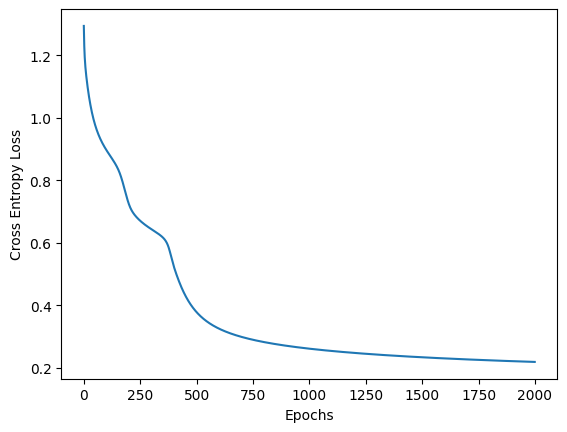

In [34]:
weight_matrices = []
ffnm = FFNetworkMulti()
ffnm.fit(X_train, y_train_OH, epochs = 2000, lr = 0.5, display_loss = True, display_weight = True )

C:\Users\Admin\AppData\Local\Temp\ipykernel_1552\2365358715.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize = (10, 1))


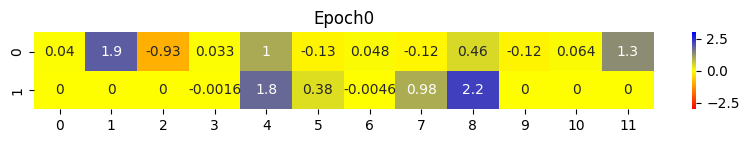

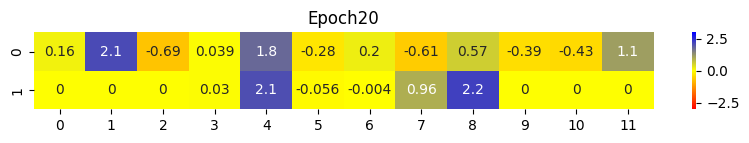

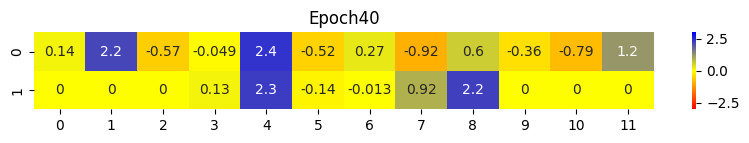

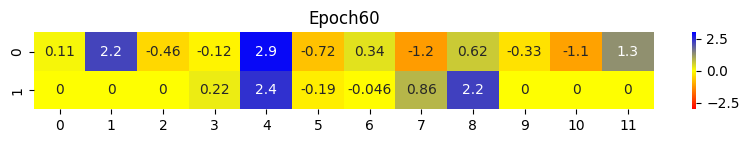

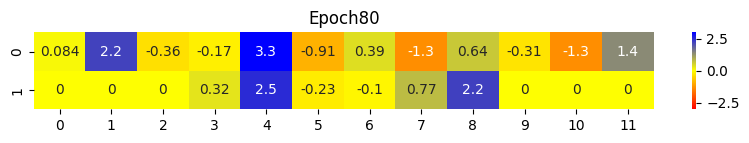

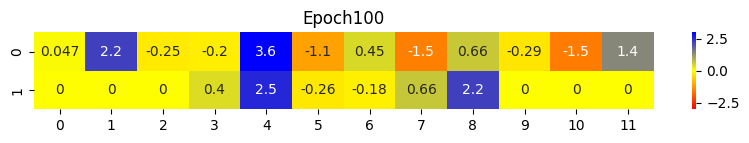

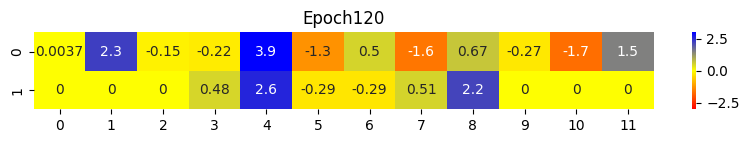

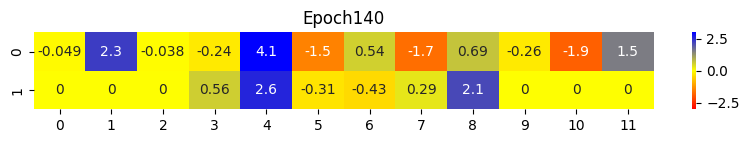

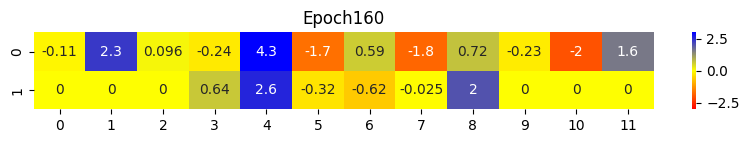

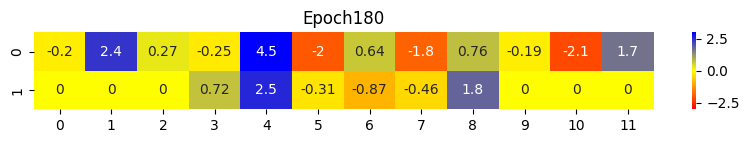

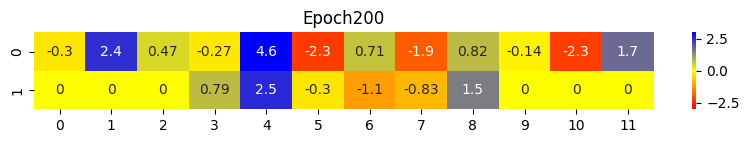

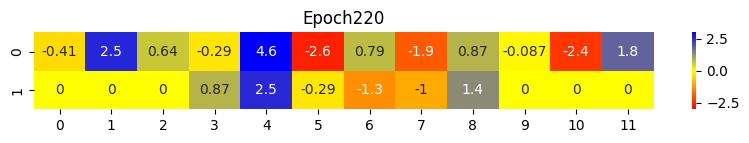

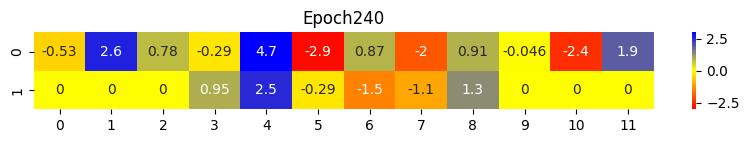

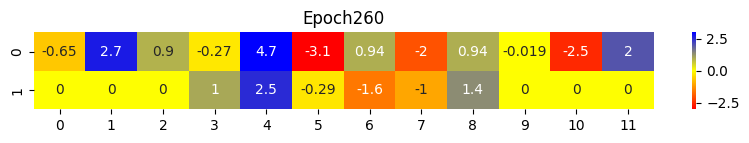

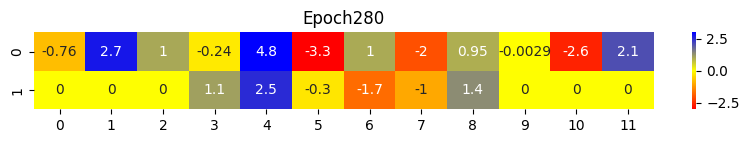

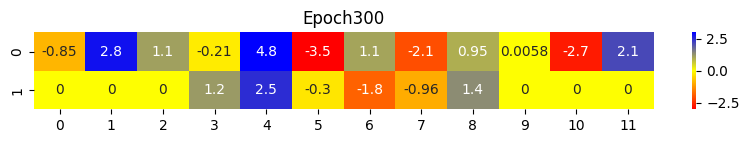

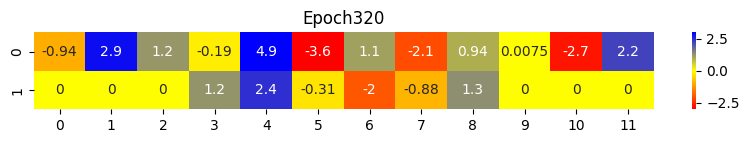

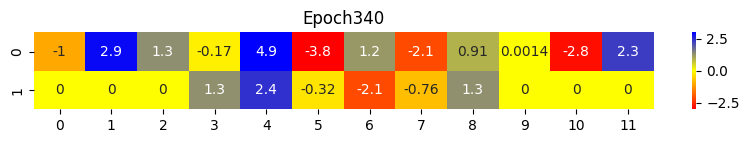

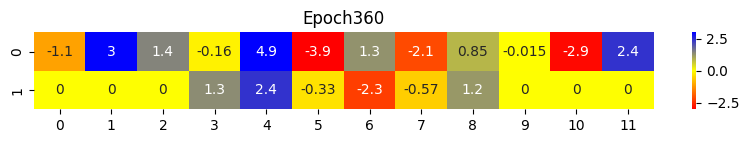

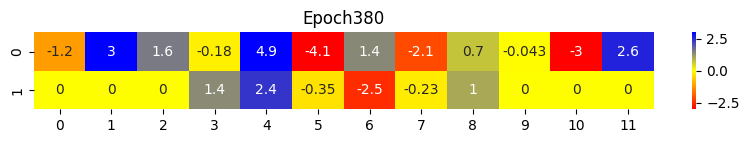

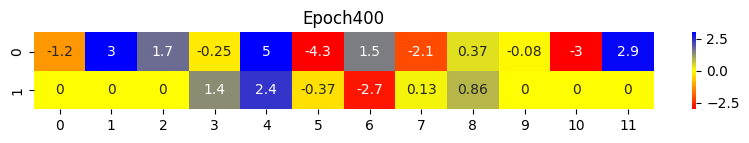

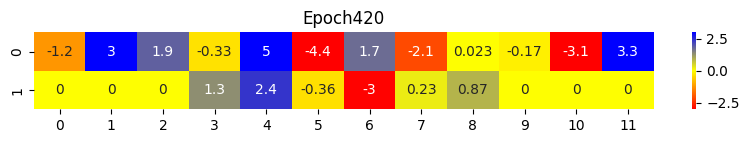

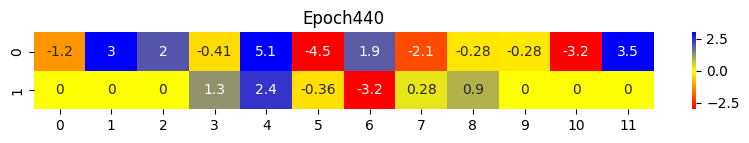

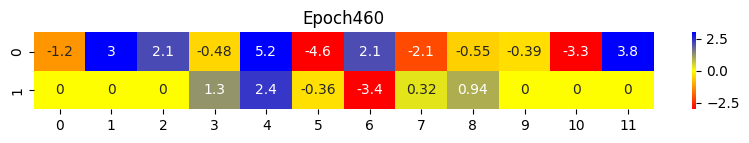

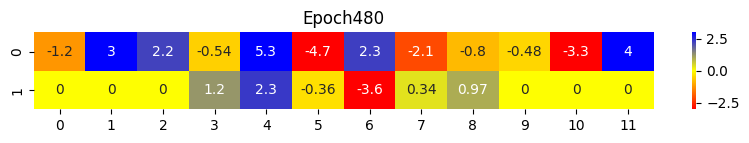

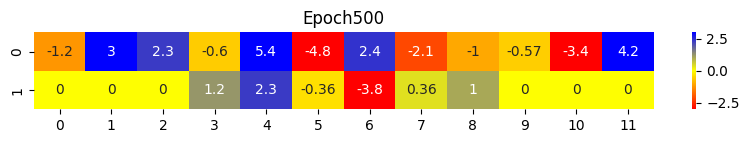

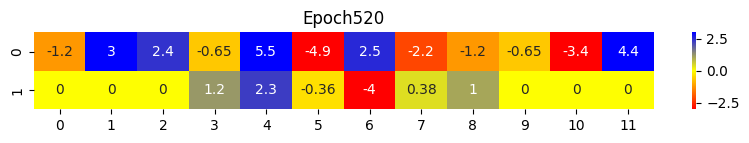

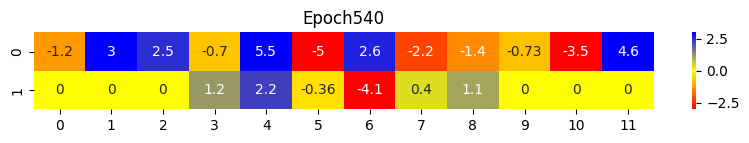

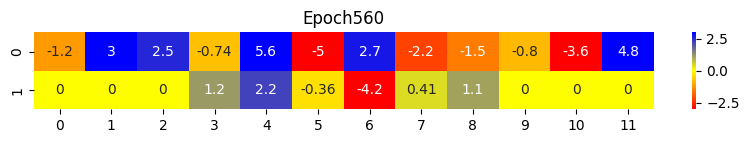

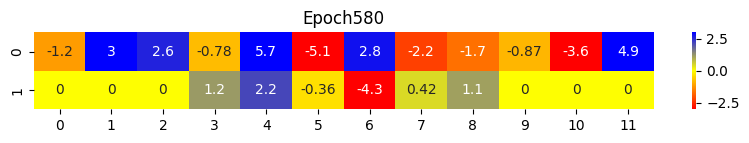

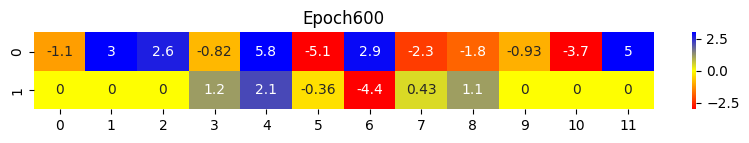

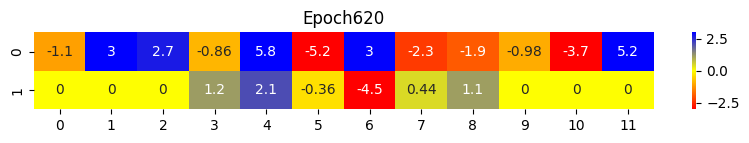

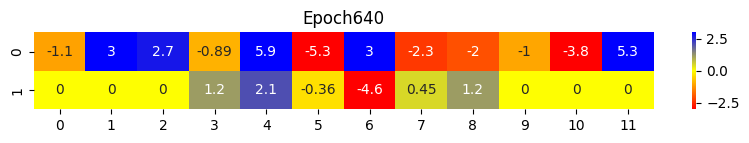

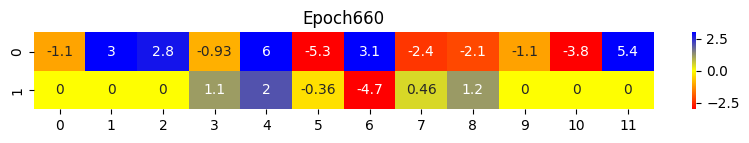

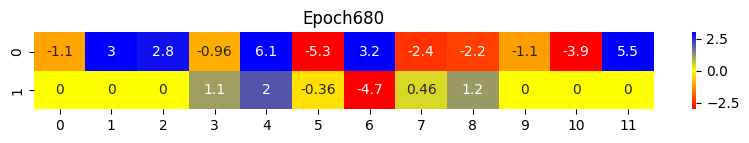

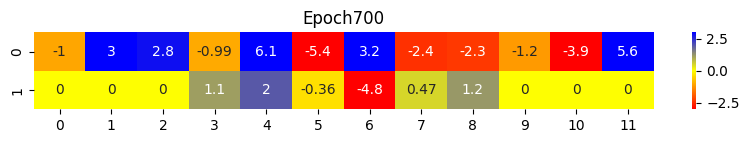

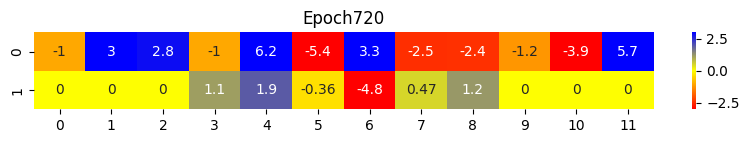

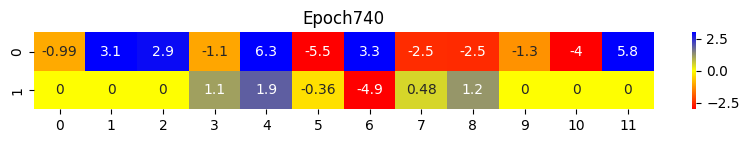

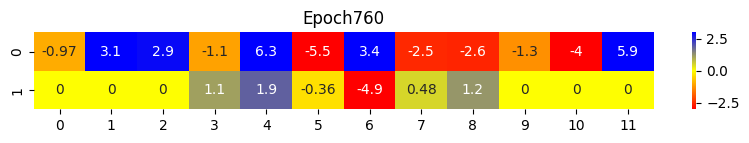

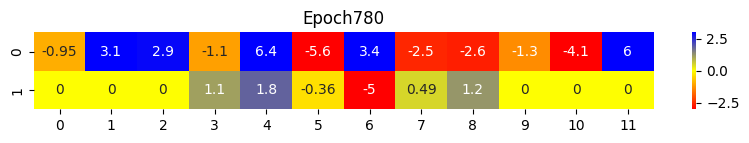

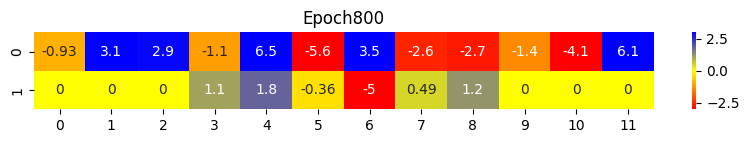

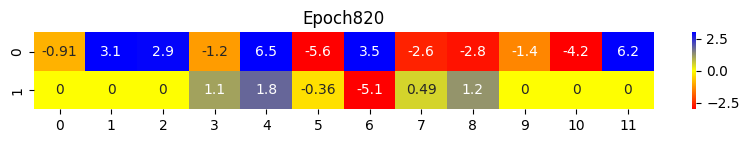

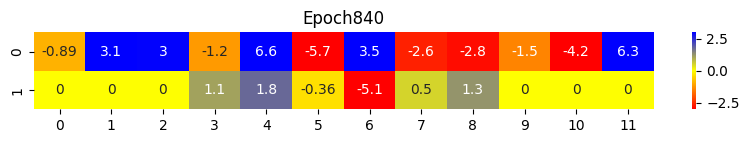

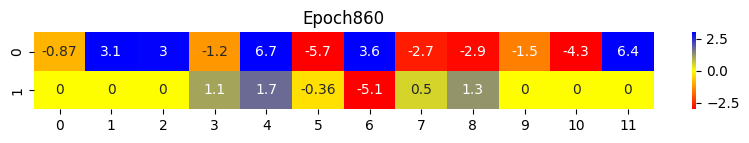

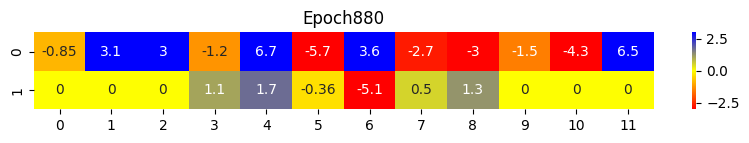

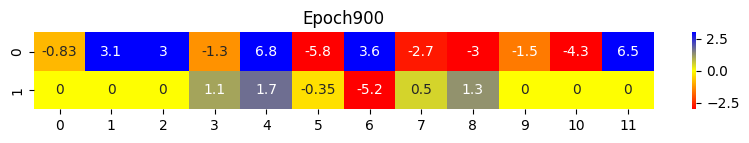

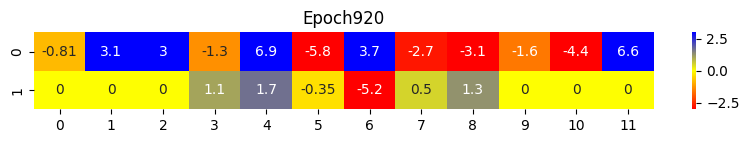

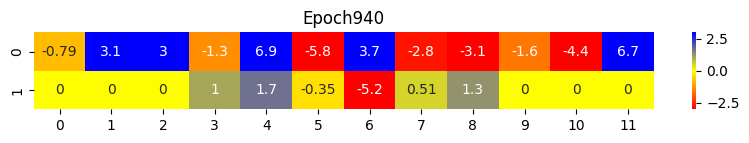

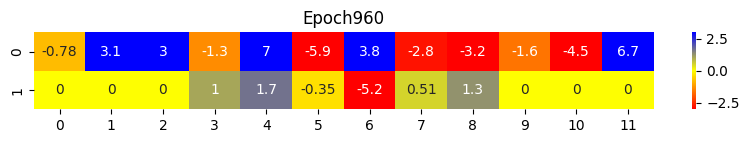

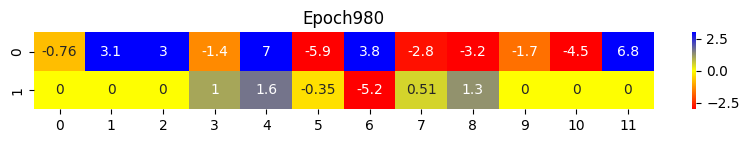

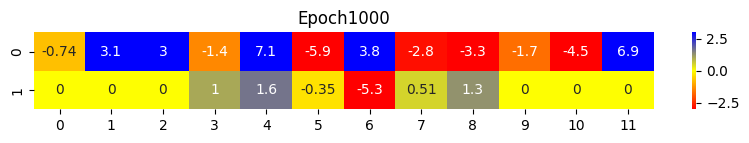

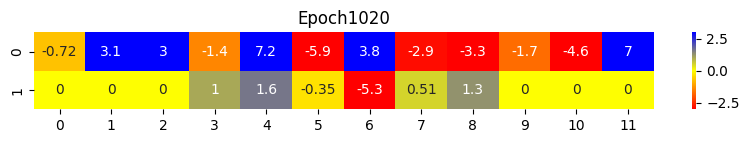

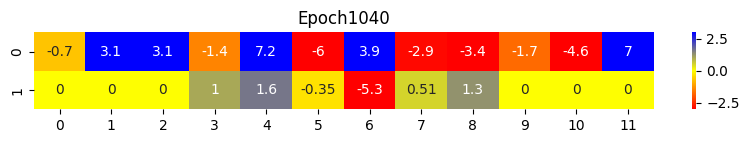

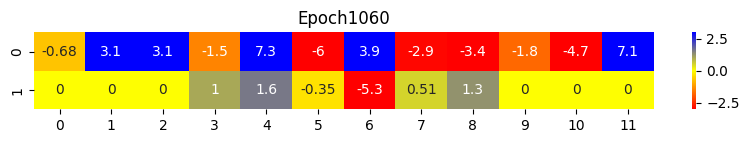

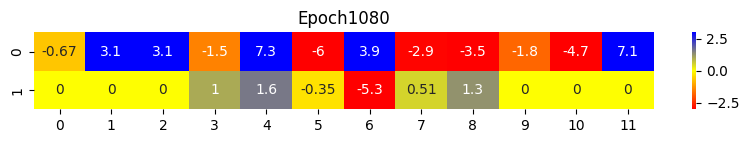

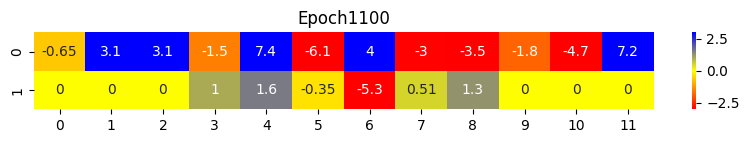

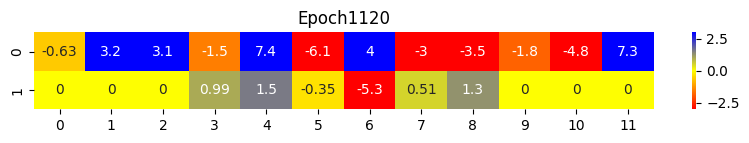

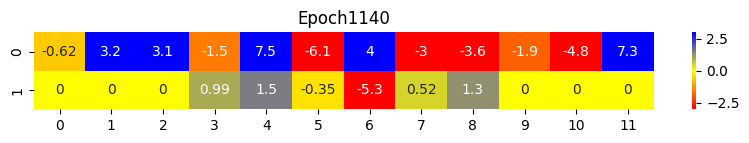

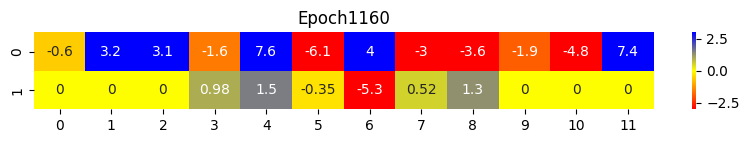

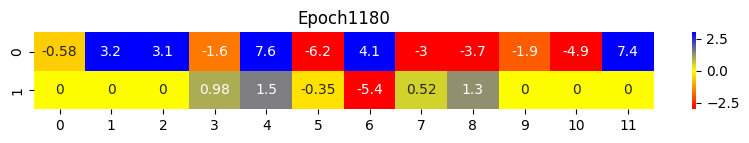

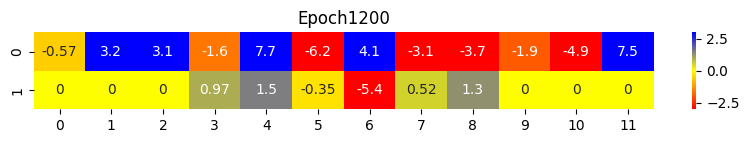

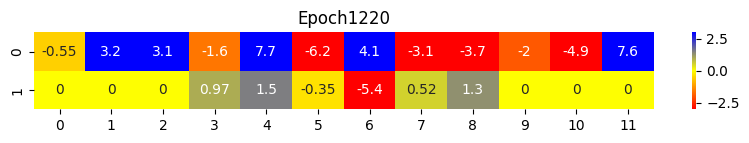

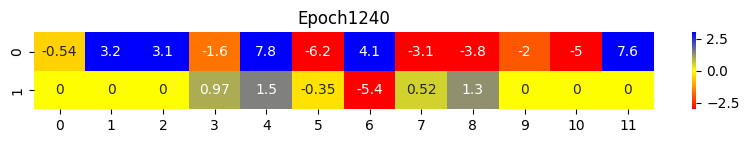

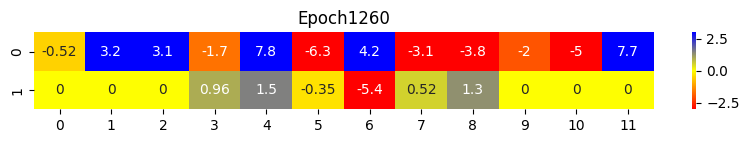

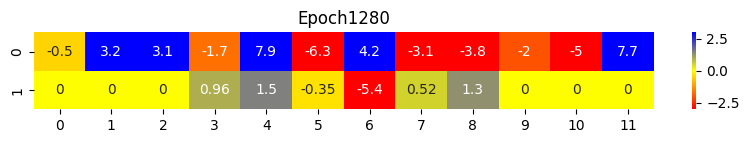

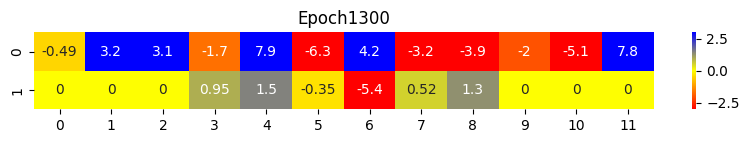

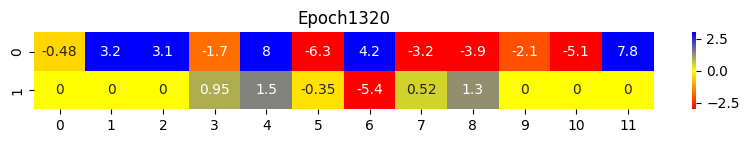

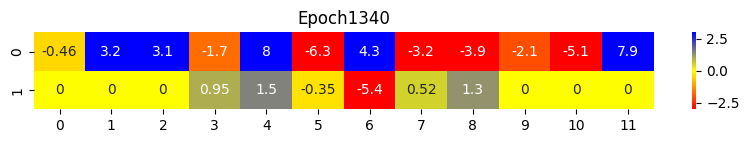

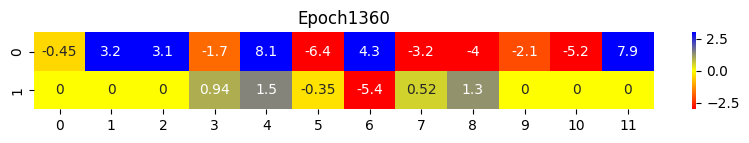

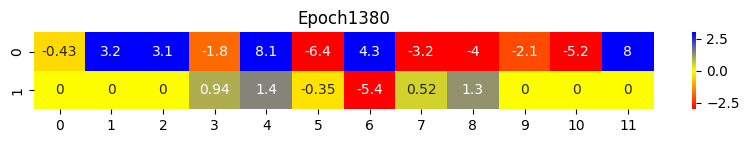

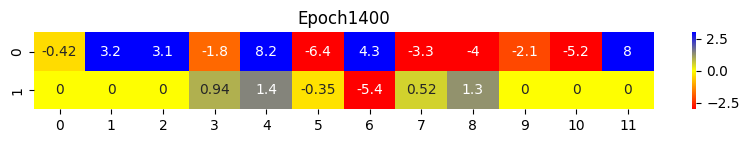

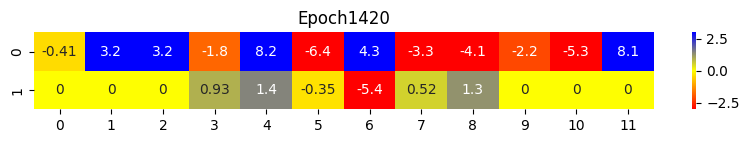

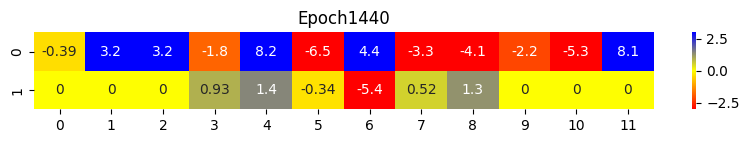

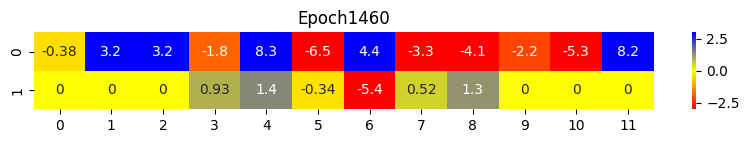

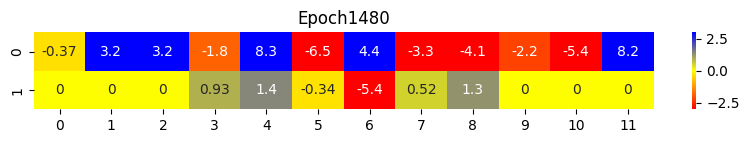

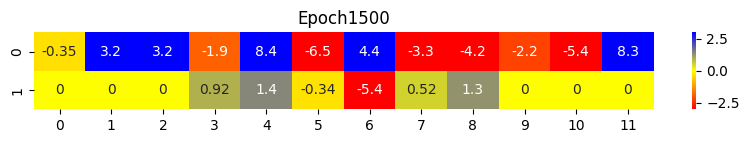

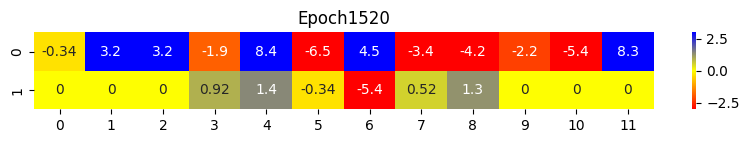

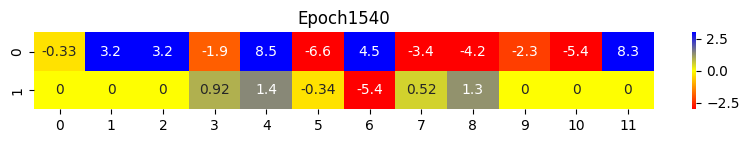

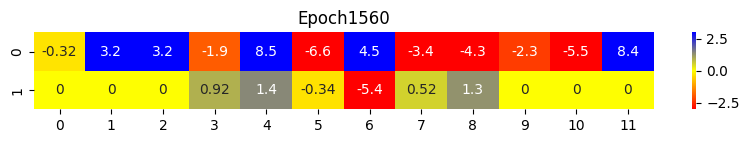

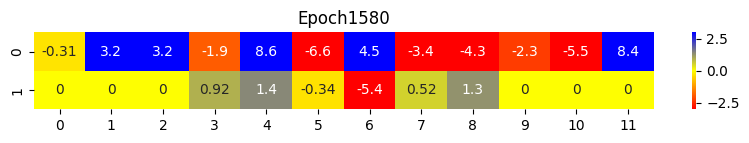

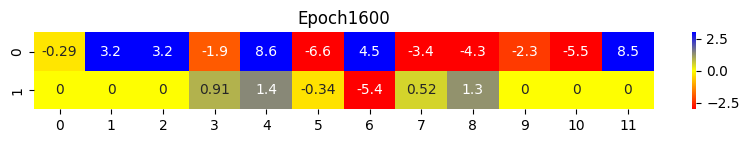

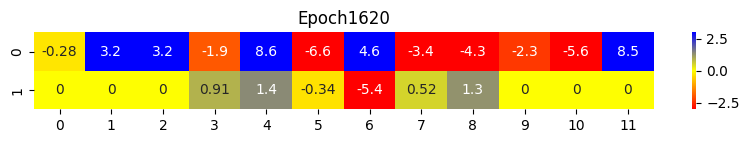

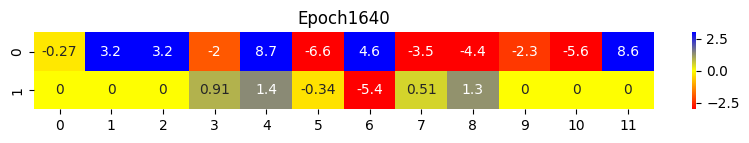

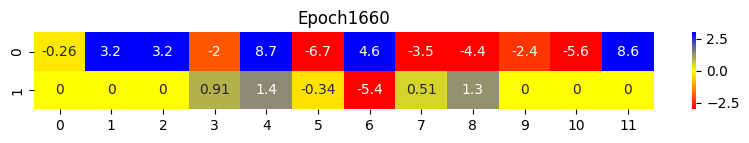

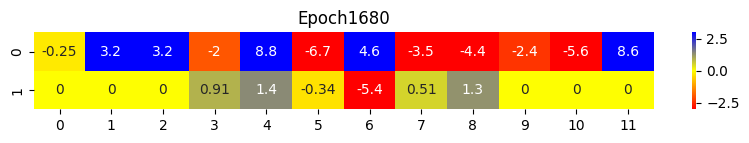

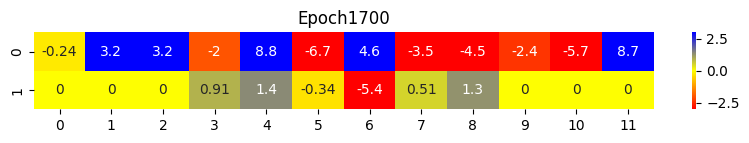

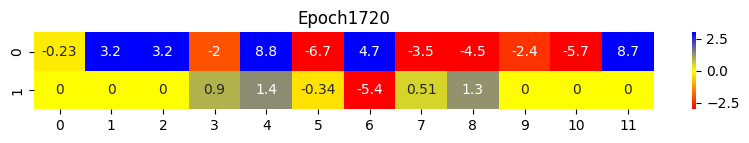

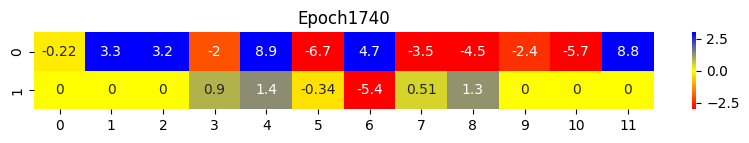

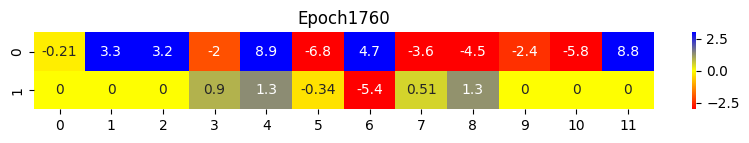

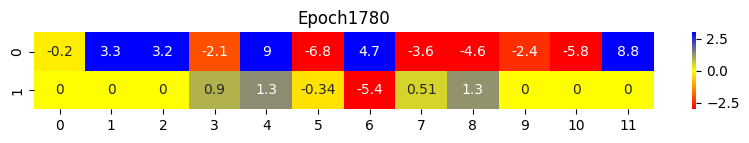

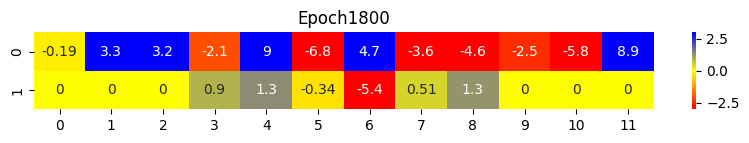

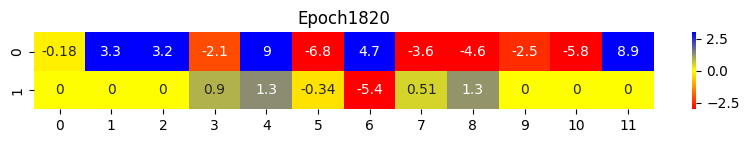

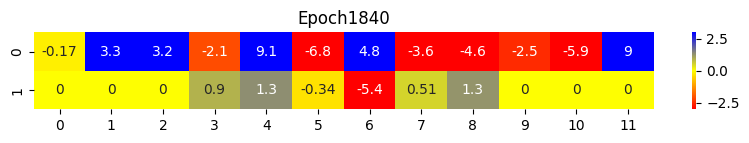

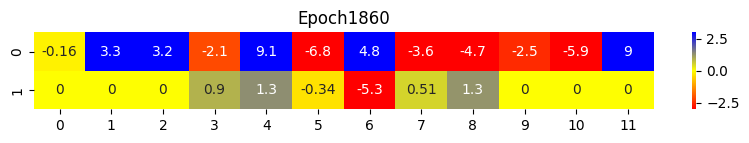

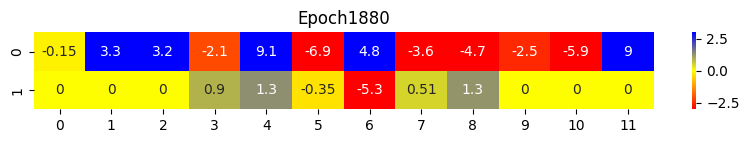

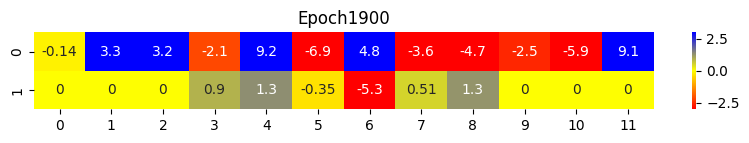

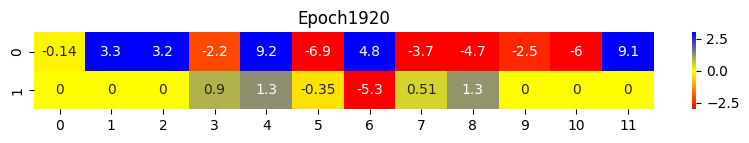

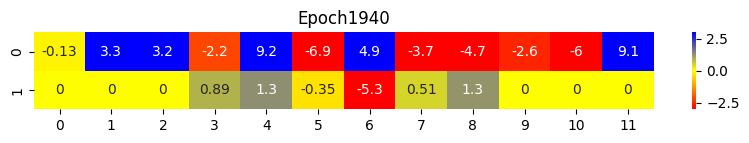

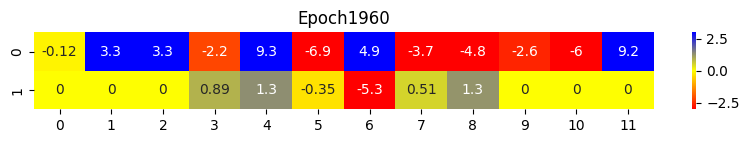

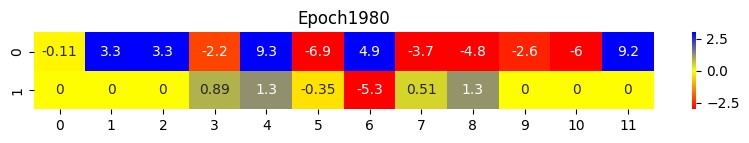

In [40]:
imageio.mimsave('./weights_viz_multi.gif', [plot_heat_map(i) for i in range(0, len(weight_matrices), len(weight_matrices)//100)], duration = 300)

In [41]:
HTML('<img src = "weights_viz_multi.gif">')

In [42]:
Y_pred_train = ffnm.predict(X_train)
Y_pred_train = np.argmax(Y_pred_train, 1)
Y_pred_test = ffnm.predict(X_test)
Y_pred_test = np.argmax(Y_pred_test, 1)
accuracy_train = accuracy_score(Y_pred_train, Y_train)
accuracy_test = accuracy_score(Y_pred_test, Y_test)

In [43]:
print("Train accuracy ", accuracy_train)
print("Test accuracy ", accuracy_test)

Train accuracy  0.916
Test accuracy  0.936


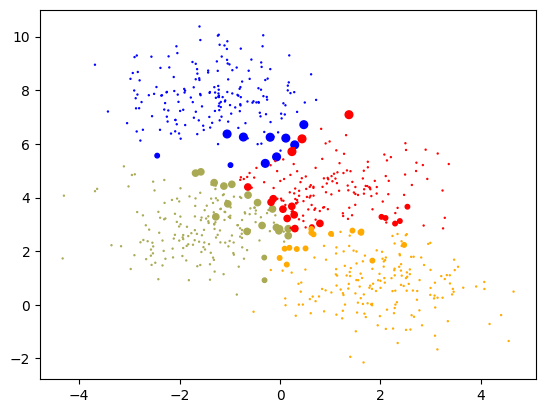

In [44]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train, cmap = cmap, s = 10*np.abs(Y_pred_train - Y_train)+.5)
plt.show()